In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sudokudetector.image import debug, render
from sudokudetector.Sudoku import Sudoku

"""Define object sudoku class"""
# game = Sudoku('jamedataset/img9 (2).jpg')
sudoku = Sudoku('dataset/image200.jpg')
# print(game.help)

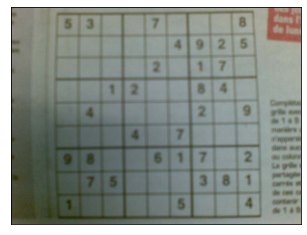

In [4]:
"""This is original image."""
debug(sudoku.load_image())

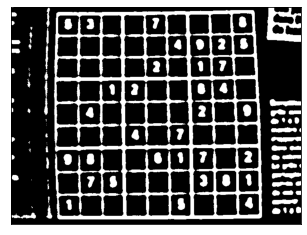

In [3]:
"""Using gray image then use Gaussian threshold"""
thresh =  cv2.cvtColor(sudoku.load_image(), cv2.COLOR_BGR2GRAY)

thresh = sudoku.adap_threshold(thresh)
# def adap_threshold(self, gray):
#     thresh = cv2.GaussianBlur(gray, (7, 7), 3)
#     thresh = cv2.adaptiveThreshold(
#         thresh, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 57, 5)
#     thresh = cv2.bitwise_not(thresh)
#     return thresh
debug(thresh)

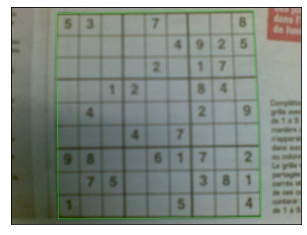

In [5]:
output = sudoku.load_image().copy()

"""find contour of sudoku table"""
list_contours = sudoku.create_contours(thresh)


"""uncomment to see all comtour"""
# for c in list_contours:
#     cv2.drawContours(output, [c], -1, (0, 255, 0), 1)

"""sort contour by area and get the largest contour that have square shape"""
table_contour = sudoku.search_largest_square_contour(list_contours)
cv2.drawContours(output, [table_contour], -1, (0, 255, 0), 1)

debug(output)



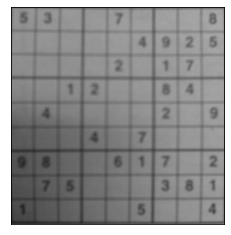

In [6]:
from imutils.perspective import four_point_transform

""""using four_point_transform function to get bird's eye view image of sudoku table"""
gray =  cv2.cvtColor(sudoku.load_image(), cv2.COLOR_BGR2GRAY)
tranformed = four_point_transform(
            gray, table_contour.reshape(4, 2))
debug(tranformed)

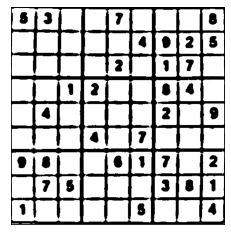

In [7]:
"""convert to binary before get number"""
binary = sudoku.convert_binary(tranformed)
debug(binary)

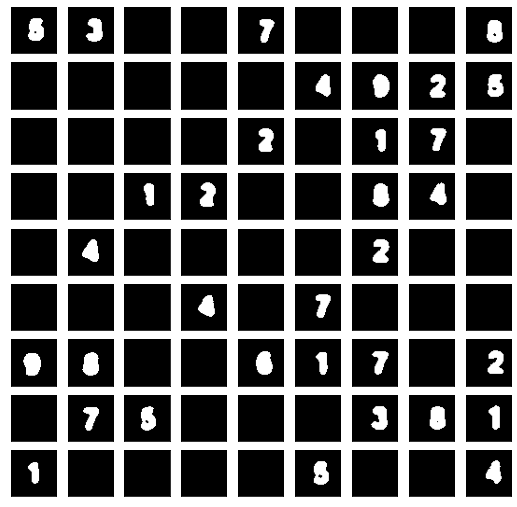

In [8]:
"""split each cell by divide image by 9 to get table"""
"""then find contour in center of cell and remove all other contour"""

sudoku_splited = sudoku.split_cells(binary)
render(sudoku_splited, (9, 9))


In [ ]:
"""Next step to prediction"""